## Data sources
The [Breast Cancer](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) datasets is available machine learning repository maintained by the University of California, Irvine. The dataset contains **569 samples of malignant and benign tumor cells**. 
* The first two columns in the dataset store the unique ID numbers of the samples and the corresponding diagnosis (M=malignant, B=benign), respectively. 
* The columns 3-32 contain 30 real-value features that have been computed from digitized images of the cell nuclei, which can be used to build a model to predict whether a tumor is benign or malignant. 

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5)
plt.style.use('fivethirtyeight')

This dataset is a direct result of medical imaging research, and is considered a classic today. The dataset was created from digitized images of healthy (benign) and cancerous (malignant) tissues. Here are what such images would look like:

![Breast Cancer Images](images/breast_cancer_images.png)

Breast cancer tissue samples from Levenson et al. (2015), PLOS ONE, doi:10.1371/journal.pone.0141357. Released under CC-BY.

The goal of the research was to classify tissue samples into benign and malignant (a binary classification task).

In order to make the classification task feasible, the researchers performed feature extraction on the images.  The features are captured in this "data.csv" file downloaded from this [UCI Breast Cancer site](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)

In [5]:
data = pd.read_csv('input/breast_cancer.csv', index_col='id',)
data.shape

(569, 31)

In [6]:
data.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

In [9]:
data.isnull().any()

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

Our "target" column should be the diagnosis:
* M : malignant (cancerous)
* B : benign (not cancerout)

In [10]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

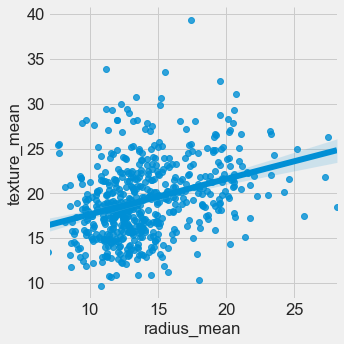

In [11]:
sns.lmplot(x='radius_mean', y='texture_mean', data=data)

## Label Encoding of Diagnosis

In [12]:
from sklearn import preprocessing

In [13]:
le = preprocessing.LabelEncoder()

In [14]:
data['diagnosis_code'] = le.fit_transform(data.diagnosis)
le.classes_

array(['B', 'M'], dtype=object)

In [15]:
data.diagnosis_code[:30]

id
842302      1
842517      1
84300903    1
84348301    1
84358402    1
843786      1
844359      1
84458202    1
844981      1
84501001    1
845636      1
84610002    1
846226      1
846381      1
84667401    1
84799002    1
848406      1
84862001    1
849014      1
8510426     0
8510653     0
8510824     0
8511133     1
851509      1
852552      1
852631      1
852763      1
852781      1
852973      1
853201      1
Name: diagnosis_code, dtype: int64

Text(0, 0.5, 'Diagnosis')

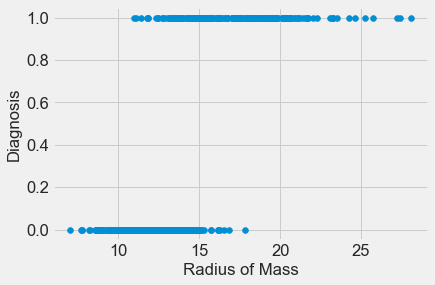

In [16]:
plt.scatter(data.radius_mean, data.diagnosis_code)
plt.xlabel('Radius of Mass')
plt.ylabel('Diagnosis')

## Linear Model

Fit a new LinearRegression predicting diagnosis from radius

In [17]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [18]:
feature_cols = ['radius_mean']
X = data[feature_cols]
y = data.diagnosis_code

In [19]:
linear_model.fit(X,y)

LinearRegression()

In [20]:
pred = linear_model.predict(X)

Text(0, 0.5, 'Diagnosis')

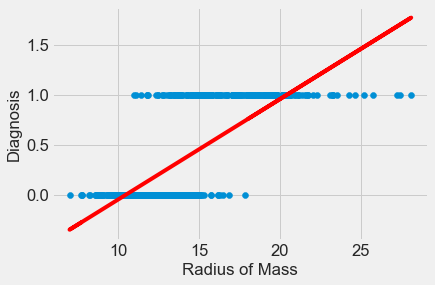

In [21]:
# scatter plot that includes our regression line using all of the data
plt.scatter(data.radius_mean, y)
plt.plot(data.radius_mean, pred, color='red')
plt.xlabel('Radius of Mass')
plt.ylabel('Diagnosis')

## Single Variable Predictor for Breast Cancer

In [22]:
data['simple_diagnosis'] = np.where(data.radius_mean >= 15.5, 1, 0)
data.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_code,simple_diagnosis
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1,1
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1,1
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1,1
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1,0
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1,1


Plot a line that shows our predictions for class membership in household vs. not.

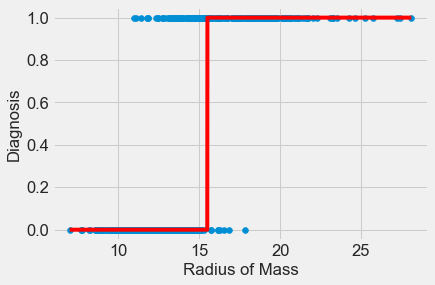

In [23]:
# sort so to have a continuous line
data.sort_values('radius_mean', inplace=True)
plt.scatter(data.radius_mean, data.diagnosis_code)
plt.xlabel('Radius of Mass')
plt.ylabel('Diagnosis')

plt.plot(data.radius_mean, data.simple_diagnosis, color='red')

In [24]:
data.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_code,simple_diagnosis
id,,,,,,,,,,,,,,,,,,,,,
862722,B,6.981,13.43,43.79,143.5,0.11700,0.07568,0.00000,0.000000,0.1930,...,50.41,185.2,0.15840,0.12020,0.0000,0.00000,0.2932,0.09382,0,0
921362,B,7.691,25.44,48.34,170.4,0.08668,0.11990,0.09252,0.013640,0.2037,...,54.49,223.6,0.15960,0.30640,0.3393,0.05000,0.2790,0.10660,0,0
921092,B,7.729,25.49,47.98,178.8,0.08098,0.04878,0.00000,0.000000,0.1870,...,57.17,248.0,0.12560,0.08340,0.0000,0.00000,0.3058,0.09938,0,0
92751,B,7.760,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.000000,0.1587,...,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039,0,0
85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,57.26,242.2,0.12970,0.13570,0.0688,0.02564,0.3105,0.07409,0,0


In [25]:
# regression model confusion matrix
#      array([[333,  24],
#             [ 45, 167]])
#
from sklearn import metrics
metrics.confusion_matrix(data.diagnosis_code, data.simple_diagnosis)

array([[349,   8],
       [ 67, 145]])

In [26]:
from sklearn.metrics import classification_report

print(classification_report(data.diagnosis_code, data.simple_diagnosis))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90       357
           1       0.95      0.68      0.79       212

    accuracy                           0.87       569
   macro avg       0.89      0.83      0.85       569
weighted avg       0.88      0.87      0.86       569



## Logistic Regression for Classification

Logistic regression is a more appropriate method for what we just did with a linear regression. The values output from a linear regression cannot be interpreted as probabilities of class membership since their values can be greater than 1 and less than 0. Logistic regression, on the other hand, ensures that the values output as predictions can be interpreted as probabilities of class membership.

Import the LogisticRegression class from linear_model below and fit the same regression model predicting household from al.

In [27]:
# Fit a logistic regression model and store the class predictions.
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

feature_cols = ['radius_mean']
X = data[feature_cols]
y = data.diagnosis_code

logreg.fit(X,y)
log_pred = logreg.predict(X)

Text(0, 0.5, 'Diagnosis')

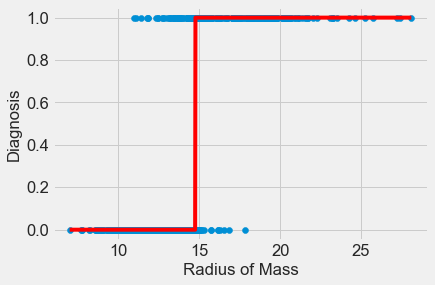

In [28]:
# Plot the logistic regression class predictions.
plt.scatter(data.radius_mean, data.diagnosis_code)
plt.plot(data.radius_mean, log_pred, color='red')
plt.xlabel('Radius of Mass')
plt.ylabel('Diagnosis')

What if we wanted the predicted probabilities instead of just the class predictions, to understand how confident we are in a given prediction?

Using the built-in .predict_proba() function, examine the predicted probabilities for the first handful of rows of X.


In [29]:
logreg.predict_proba(X)[0:5]

array([[9.99653430e-01, 3.46569773e-04],
       [9.99282846e-01, 7.17153716e-04],
       [9.99254390e-01, 7.45609839e-04],
       [9.99230342e-01, 7.69657670e-04],
       [9.98797322e-01, 1.20267803e-03]])

Sklearn orders the columns according to our class labels. The two-column output of predict_proba returns a column for each class of our household variable. The first column is the probability of household=0 for a given row, and the second column is the probability of household=1.

Store the predicted probabilities of class=1 in its own column in the data set.


In [30]:
# Store the predicted probabilities of class 1.
data['diagnosis_pred_prob'] = logreg.predict_proba(X)[:, 1]

In [31]:
data.tail(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_code,simple_diagnosis,diagnosis_pred_prob
id,,,,,,,,,,,,,,,,,,,,,
8611555,M,25.22,24.91,171.5,1878.0,0.1063,0.2665,0.3339,0.1845,0.1829,...,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510,1,1,0.999978
899987,M,25.73,17.46,174.2,2010.0,0.1149,0.2363,0.3368,0.1913,0.1956,...,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815,1,1,0.999987
873592,M,27.22,21.87,182.1,2250.0,0.1094,0.1914,0.2871,0.1878,0.1800,...,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082,1,1,0.999997
911296202,M,27.42,26.27,186.9,2501.0,0.1084,0.1988,0.3635,0.1689,0.2061,...,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427,1,1,0.999998
8810703,M,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,...,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525,1,1,0.999999


Text(0, 0.5, 'Diagnosis')

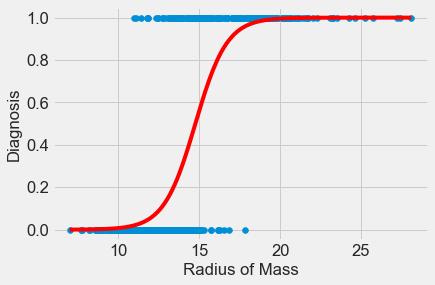

In [32]:
# Plot the predicted probabilities.
plt.scatter(data.radius_mean, data.diagnosis_code)
plt.plot(data.radius_mean, data.diagnosis_pred_prob, color='red')
plt.xlabel('Radius of Mass')
plt.ylabel('Diagnosis')

In [33]:
# let's look at the parameter estimates for the logistic regression

logreg.coef_

array([[1.02475609]])

In [34]:
logreg.intercept_

array([-15.120902])

Interpretation: let `x` be an input such as `radius_mean`

$$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$

That means we'll get out the log odds if we compute the intercept plus the coefficient times a value for `radius_mean`.

This log odds ratio can be rearranged to the logistic regression equation:

$$\hat{p} = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$

In other words:

- Logistic regression outputs the probabilities of a specific class.
- Those probabilities can be converted into class predictions.

The logistic function has some nice properties:

- Takes on an "s" shape
- Output is bounded by 0 and 1

We have covered how this works for binary classification problems (two response classes). But what about multi-class classification problems (more than two response classes)?

- The most common solution for classification models is "one-vs-all" (also known as "one-vs-rest"): Decompose the problem into multiple binary classification problems.
- Multinomial logistic regression, on the other hand, can solve this as a single problem, but how this works is beyond the scope of this lesson.

In [35]:
metrics.confusion_matrix(data.diagnosis_code, log_pred)


array([[333,  24],
       [ 45, 167]])

In [36]:
print(classification_report(data.diagnosis_code, log_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       357
           1       0.87      0.79      0.83       212

    accuracy                           0.88       569
   macro avg       0.88      0.86      0.87       569
weighted avg       0.88      0.88      0.88       569



## Model Evaluation with Train Test Split

In [37]:
from sklearn.linear_model import LogisticRegression

feature_cols = ['radius_mean']
X = data[feature_cols]
y = data.diagnosis_code

# test train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.25,random_state=0)

# logistic regression model fit
linear_model.fit(X_train,y_train)

# do prediction on test Data
y_pred=linear_model.predict(X_test)

# calculate sum of squares of residuals
(y_test - y_pred).map(lambda x: x*x).sum()

16.947661598703686

Find the `coefficient of determination` $R^2$ of the prediction.

The coefficient $R^2$ is defined as $(1 - \frac{u}{v})$, where u is the residual sum of squares $\sum((y_{true} - y_{pred}) ^ 2)$ and v is the total sum of squares $\sum((y_{true} - \overline{y_{true}}) ^ 2)$. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a $R^2$ score of $0.0$.

In [38]:
# Calculate R^2
linear_model.score(X_test,y_test)

0.48784539124796555

## Decision Tree for Classification


In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

import pydotplus  # for tree visualization
from IPython.display import Image 
tree_model = DecisionTreeClassifier(random_state=0,max_depth=7)

# split data into training and testing
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.25, random_state=0)

tree_model.fit(X_train,y_train)

y_pred = tree_model.predict(X_test)
(y_test - y_pred).map(lambda x: x*x).sum()

17

In [40]:
tree_model.score(X_test,y_test)

0.8811188811188811

In [42]:
X_train.columns.values

array(['radius_mean'], dtype=object)

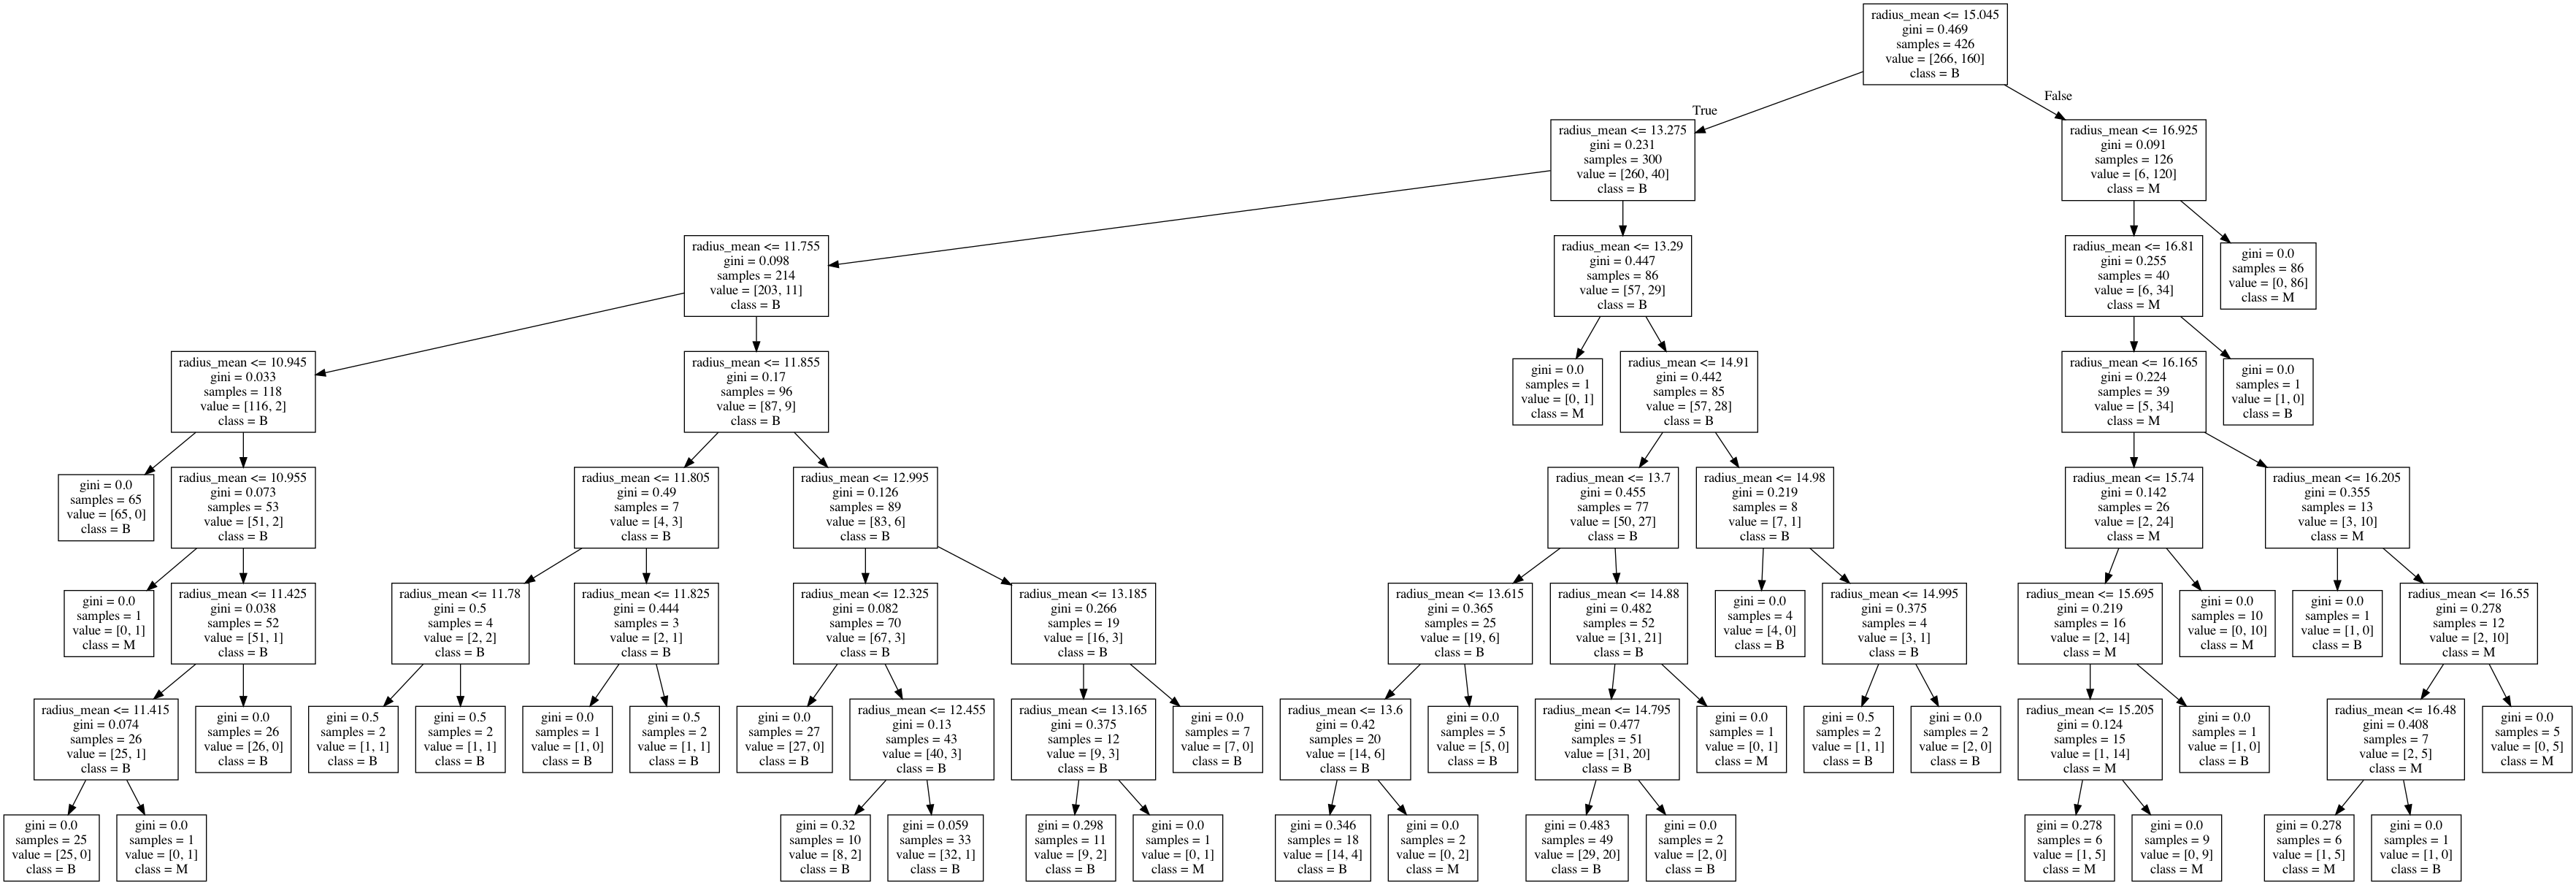

In [41]:
# Create DOT data
dot_data = tree.export_graphviz(tree_model, out_file=None, 
                                feature_names=X_train.columns.values,  
                                class_names=['B', 'M'])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [259]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[85,  6],
       [11, 41]])

In [260]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        91
           1       0.87      0.79      0.83        52

    accuracy                           0.88       143
   macro avg       0.88      0.86      0.87       143
weighted avg       0.88      0.88      0.88       143



## Support Vector Machine (SVM) & Structural Risk Minimization (SRM)

In [261]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [262]:
y_pred_class = clf.predict(X_train)
training_accuracy = metrics.accuracy_score(y_train, y_pred_class)
training_error = 1 - training_accuracy

y_pred_class = clf.predict(X_test)
testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
testing_error = 1 - testing_accuracy
print("SVM Test accuracy: {0}, Test error: {1}".format(testing_accuracy, testing_error))

SVM Test accuracy: 0.8881118881118881, Test error: 0.11188811188811187


In [263]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[86,  5],
       [11, 41]])

In [264]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.89      0.95      0.91        91
           1       0.89      0.79      0.84        52

    accuracy                           0.89       143
   macro avg       0.89      0.87      0.88       143
weighted avg       0.89      0.89      0.89       143



## Ensemble Methods

Ensemble learning combines several base algorithms to form one optimized predictive algorithm. For example, a typical Decision Tree for classification takes several factors, turns them into rule questions, and given each factor, either makes a decision or considers another factor. The result of the decision tree can become ambiguous if there are multiple decision rules, e.g. if threshold to make a decision is unclear or we input new sub-factors for consideration. This is where Ensemble Methods comes at one's disposable. Instead of being hopeful on one Decision Tree to make the right call, Ensemble Methods take several different trees and aggregate them into one final, strong predictor.

Ensemble Methods can also be divided into two groups:

* __Sequential Learners__, where different models are generated sequentially and the mistakes of previous models are learned by their successors. This aims at exploiting the dependency between models by giving the mislabeled examples higher weights (e.g. AdaBoost).
* __Parallel Learners__, where base models are generated in parallel. This exploits the independence between models by averaging out the mistakes (e.g. Random Forest).

## Random Forest Classifier

If we use all the other dimensions available in the input, it is much harder to understand each dimension at a time. A popular classifier that can learn from high dimensionality data is Random Forest -- which is an ensemble of classifiers that try to combine them to take advantage of how each of those may work in input regions best learned by each classifier. 

Let's first grab all the X without multicolinearity of inputs related to diagnosis.

In [41]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis_code',
       'simple_diagnosis', 'diagnosis_pred_prob'],
      dtype='object')

In [171]:
X = data.drop(['diagnosis', 'diagnosis_code', 'simple_diagnosis', 'diagnosis_pred_prob'], axis=1)
X.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [172]:
y = data.diagnosis_code
len(y)

569

In [173]:
# split data into training and testing
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.25, random_state=0)

## Standardizing our inputs

StandardScaler standardizes our data by subtracting the mean from each feature and dividing by its standard deviation.

In [174]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# We fit to figure out the distribution
scaler.fit(X_train)

# now we transform everything using that
# if you wanted to do it all in one step ==> X_train = scaler.fit_transform(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 1 Shot RF Classifier

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [76]:
# Calculate testing error.
rf_model = RandomForestClassifier(n_estimators=40,max_depth=10, 
                                  random_state=0)

rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=40, random_state=0)

In [77]:
y_pred_class = rf_model.predict(X_train)
training_accuracy = metrics.accuracy_score(y_train, y_pred_class)
training_error = 1 - training_accuracy

y_pred_class = rf_model.predict(X_test)
testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
testing_error = 1 - testing_accuracy
print("Simple Random Forest Test accuracy: {0}, Test error: {1}".format(testing_accuracy, testing_error))

Simple Random Forest Test accuracy: 0.958041958041958, Test error: 0.04195804195804198


In [78]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[86,  5],
       [ 1, 51]])

In [79]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97        91
           1       0.91      0.98      0.94        52

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



## Hyperparameter Optimization

How do we know how to choose `n_estimators` or `max_depth`?  Well, that was the black magic.  One way to choose is to iterate through a range of values & find the one that performs best against the test data.

In [80]:
n_range = np.arange(40, 140, 1)
n_range[:10]

array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [81]:
training_error = []
testing_error = []
for n in n_range:
    rf_model = RandomForestClassifier(n_estimators=n,max_depth=10, 
                                      random_state=0)

    rf_model.fit(X_train, y_train)
    
    y_pred_class = rf_model.predict(X_train)
    training_accuracy = metrics.accuracy_score(y_train, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    y_pred_class = rf_model.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

In [82]:
# Create a DataFrame of the search with training error, and testing error.
column_dict = {'n': n_range, 'training error':training_error, 'testing error':testing_error}
df = pd.DataFrame(column_dict).set_index('n').sort_index(ascending=True)
df.head()

,training error,testing error
n,,
40,0.0,0.041958
41,0.0,0.041958
42,0.0,0.041958
43,0.0,0.041958
44,0.0,0.041958


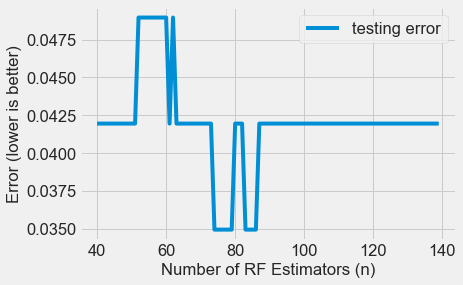

In [83]:
# Plot the relationship between number of RF estimators (n) and TESTING ERROR.
df.plot(y='testing error');
plt.xlabel('Number of RF Estimators (n)');
plt.ylabel('Error (lower is better)');

In [84]:
# Find the minimum testing error and the associated K value.
df.sort_values('testing error').head(10)

,training error,testing error
n,,
86,0.0,0.034965
85,0.0,0.034965
84,0.0,0.034965
83,0.0,0.034965
74,0.0,0.034965
75,0.0,0.034965
76,0.0,0.034965
79,0.0,0.034965
78,0.0,0.034965


In [85]:
BEST_N = 74

In [86]:
depth_range = np.arange(2, 21, 1)
depth_range[:10]

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [87]:
training_error = []
testing_error = []
for depth in depth_range:
    rf_model = RandomForestClassifier(n_estimators=BEST_N,max_depth=depth, 
                                      random_state=0)

    rf_model.fit(X_train, y_train)
    
    y_pred_class = rf_model.predict(X_train)
    training_accuracy = metrics.accuracy_score(y_train, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    y_pred_class = rf_model.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

In [88]:
# Create a DataFrame of the search with training error, and testing error.
column_dict = {'depth': depth_range, 'training error':training_error, 'testing error':testing_error}
df = pd.DataFrame(column_dict).set_index('depth').sort_index(ascending=True)
df.head()

,training error,testing error
depth,,
2,0.039906,0.062937
3,0.028169,0.048951
4,0.011737,0.055944
5,0.004695,0.041958
6,0.002347,0.034965


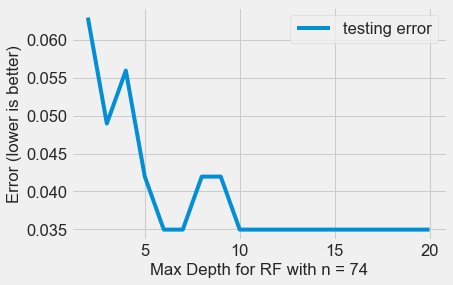

In [89]:
# Plot the relationship between number of RF estimators (n) and TESTING ERROR.
df.plot(y='testing error');
plt.xlabel('Max Depth for RF with n = ' + str(BEST_N));
plt.ylabel('Error (lower is better)');

In [90]:
# Find the minimum testing error and the associated K value.
df.sort_values('testing error').head(10)

,training error,testing error
depth,,
11,0.0,0.034965
18,0.0,0.034965
17,0.0,0.034965
16,0.0,0.034965
15,0.0,0.034965
14,0.0,0.034965
13,0.0,0.034965
12,0.0,0.034965
19,0.0,0.034965


In [91]:
BEST_DEPTH=10

In [92]:
rf_model = RandomForestClassifier(n_estimators=BEST_N,max_depth=BEST_DEPTH, 
                                      random_state=0)

rf_model.fit(X_train, y_train)

y_pred_class = rf_model.predict(X_train)
training_accuracy = metrics.accuracy_score(y_train, y_pred_class)
training_error = 1 - training_accuracy

y_pred_class = rf_model.predict(X_test)
testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
testing_error = 1 - testing_accuracy

In [93]:
print("Best RF Model Test accuracy: {0}, Test error: {1}".format(testing_accuracy, testing_error))

Best RF Model Test accuracy: 0.965034965034965, Test error: 0.034965034965035


In [94]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[87,  4],
       [ 1, 51]])

In [95]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        91
           1       0.93      0.98      0.95        52

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



## AdaBoost

AdaBoost (Adaptive Boosting) is a very popular boosting technique that aims at combining multiple weak classifiers to build one strong classifier. The original AdaBoost paper was authored by Yoav Freund and Robert Schapire.

A single classifier may not be able to accurately predict the class of an object, but when we group multiple weak classifiers with each one progressively learning from the others' wrongly classified objects, we can build one such strong model. The classifier mentioned here could be any of your basic classifiers, from Decision Trees (often the default) to Logistic Regression, etc.

Now we may ask, what is a "weak" classifier? A weak classifier is one that performs better than random guessing, but still performs poorly at designating classes to objects. For example, a weak classifier may predict that everyone above the age of 40 could not run a marathon but people falling below that age could. Now, you might get above 60% accuracy, but you would still be misclassifying a lot of data points!

Rather than being a model in itself, AdaBoost can be applied on top of any classifier to learn from its shortcomings and propose a more accurate model. It is usually called the “best out-of-the-box classifier” for this reason.

In [127]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier()

In [128]:
ada_model.fit(X_train, y_train)

y_pred_class = ada_model.predict(X_train)
training_accuracy = metrics.accuracy_score(y_train, y_pred_class)
training_error = 1 - training_accuracy

y_pred_class = ada_model.predict(X_test)
testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
testing_error = 1 - testing_accuracy

In [129]:
print("AdaBoost Test accuracy: {0}, Test error: {1}".format(testing_accuracy, testing_error))

AdaBoost Test accuracy: 0.972027972027972, Test error: 0.027972027972028024


In [130]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[89,  2],
       [ 2, 50]])

In [131]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        91
           1       0.96      0.96      0.96        52

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



## XGBoost

In [96]:
import xgboost as xgb

The simplest parameters are the `max_depth` (maximum depth of the decision trees being trained), `objective` (the loss function being used), and `num_class` (the number of classes in the dataset). The eta algorithm requires special attention.

From our theory, Gradient Boosting involves creating and adding decision trees to an ensemble model sequentially. New trees are created to correct the residual errors in the predictions from the existing ensemble.
Due to the nature of an ensemble, i.e having several models put together to form what is essentially a very large complicated one, makes this technique prone to overfitting. The eta parameter gives us a chance to prevent this overfitting.

The `eta` can be thought of more intuitively as a learning rate. Rather than simply adding the predictions of new trees to the ensemble with full weight, the eta will be multiplied by the residuals being adding to reduce their weight. This effectively reduces the complexity of the overall model.

It is common to have small values in the range of 0.1 to 0.3. The smaller weighting of these residuals will still help us train a powerful model, but won’t let that model run away into deep complexity where overfitting is more likely to happen.

In [97]:
param = {
    'eta': 0.05, 
    'max_depth': 5,  
    'objective': 'multi:softprob',  
    'num_class': 2} 

steps = 20  # The number of training iterations

In [98]:
type(y_train)

pandas.core.series.Series

In order for XGBoost to be able to use our data, we’ll need to transform it into a specific format that XGBoost can handle. That format is called DMatrix. It’s a very simple one-linear to transform a numpy array of data to DMatrix format:

In [99]:
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

In [100]:
xgb_model = xgb.train(param, D_train, steps)

In [101]:
y_pred_class[:20]

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0])

In [102]:
xy_pred_prob = xgb_model.predict(D_train)
xy_pred_class = np.asarray([np.argmax(line) for line in xy_pred_prob])
training_accuracy = metrics.accuracy_score(y_train, xy_pred_class)
training_error = 1 - training_accuracy

In [103]:
xy_pred_prob = xgb_model.predict(D_test)
xy_pred_class = np.asarray([np.argmax(line) for line in xy_pred_prob])
testing_accuracy = metrics.accuracy_score(y_test, xy_pred_class)
testing_error = 1 - testing_accuracy

In [104]:
print("XGBoost Test accuracy: {0}, Test error: {1}".format(testing_accuracy, testing_error))

XGBoost Test accuracy: 0.951048951048951, Test error: 0.04895104895104896


In [108]:
depth_range = np.arange(1,11,1)
depth_range

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [126]:
for depth in depth_range:
    param = {
        'eta': 0.01, 
        'max_depth': depth,  
        'objective': 'multi:softprob',  
        'num_class': 2} 

    steps = 10  # The number of training iterations
    xgb_model = xgb.train(param, D_train, steps)
    
    xy_pred_prob = xgb_model.predict(D_train)
    xy_pred_class = np.asarray([np.argmax(line) for line in xy_pred_prob])
    training_accuracy = metrics.accuracy_score(y_train, xy_pred_class)
    training_error = 1 - training_accuracy
    
    xy_pred_prob = xgb_model.predict(D_test)
    xy_pred_class = np.asarray([np.argmax(line) for line in xy_pred_prob])
    testing_accuracy = metrics.accuracy_score(y_test, xy_pred_class)
    testing_error = 1 - testing_accuracy
    
    print("XGBoost with depth {0} => accuracy: {1}, Test error: {2}"
          .format(depth, testing_accuracy, testing_error))

XGBoost with depth 1 => accuracy: 0.9090909090909091, Test error: 0.09090909090909094
XGBoost with depth 2 => accuracy: 0.9300699300699301, Test error: 0.0699300699300699
XGBoost with depth 3 => accuracy: 0.9300699300699301, Test error: 0.0699300699300699
XGBoost with depth 4 => accuracy: 0.9440559440559441, Test error: 0.05594405594405594
XGBoost with depth 5 => accuracy: 0.965034965034965, Test error: 0.034965034965035
XGBoost with depth 6 => accuracy: 0.965034965034965, Test error: 0.034965034965035
XGBoost with depth 7 => accuracy: 0.965034965034965, Test error: 0.034965034965035
XGBoost with depth 8 => accuracy: 0.965034965034965, Test error: 0.034965034965035
XGBoost with depth 9 => accuracy: 0.965034965034965, Test error: 0.034965034965035
XGBoost with depth 10 => accuracy: 0.965034965034965, Test error: 0.034965034965035


In [124]:
XG_DEPTH = 5
param = {
    'eta': 0.01, 
    'max_depth': XG_DEPTH,  
    'objective': 'multi:softprob',  
    'num_class': 2} 

steps = 10  # The number of training iterations
xgb_model = xgb.train(param, D_train, steps)

xy_pred_prob = xgb_model.predict(D_train)
xy_pred_class = np.asarray([np.argmax(line) for line in xy_pred_prob])
training_accuracy = metrics.accuracy_score(y_train, xy_pred_class)
training_error = 1 - training_accuracy

xy_pred_prob = xgb_model.predict(D_test)
xy_pred_class = np.asarray([np.argmax(line) for line in xy_pred_prob])
testing_accuracy = metrics.accuracy_score(y_test, xy_pred_class)
testing_error = 1 - testing_accuracy

print("XGBoost with depth {0} => accuracy: {1}, Test error: {2}"
      .format(XG_DEPTH, testing_accuracy, testing_error))
print("Confusion Matrix:\n{0}".format(metrics.confusion_matrix(y_test, y_pred_class)))
print(classification_report(y_test, y_pred_class))

XGBoost with depth 5 => accuracy: 0.965034965034965, Test error: 0.034965034965035
Confusion Matrix:
[[87  4]
 [ 1 51]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        91
           1       0.93      0.98      0.95        52

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



## Deep Learning : Multilayer Perceptrons with ReLU activation

In [140]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from keras import optimizers
from keras.models import Model, Sequential
from keras.layers import Dense, Activation
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate, BatchNormalization, Conv1D, Conv2D, Flatten, MaxPooling1D
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [176]:
print("{0}, {1}".format(X_train.shape, X_test.shape))

(426, 30), (143, 30)


In [177]:
print("{0}, {1}".format(len(y_train), len(y_test)))

426, 143


In [214]:
# define a fully connected feedforward keras model
model = Sequential()
model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(X_train.shape[1]*2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [215]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [216]:
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=50, batch_size=10)

Epoch 1/50
43/43 [==============================] - 0s 803us/step - loss: 0.4613 - accuracy: 0.8592
Epoch 2/50
43/43 [==============================] - 0s 787us/step - loss: 0.1833 - accuracy: 0.9460
Epoch 3/50
43/43 [==============================] - 0s 764us/step - loss: 0.1142 - accuracy: 0.9695
Epoch 4/50
43/43 [==============================] - 0s 732us/step - loss: 0.0864 - accuracy: 0.9742
Epoch 5/50
43/43 [==============================] - 0s 753us/step - loss: 0.0716 - accuracy: 0.9742
Epoch 6/50
43/43 [==============================] - 0s 772us/step - loss: 0.0631 - accuracy: 0.9789
Epoch 7/50
43/43 [==============================] - 0s 785us/step - loss: 0.0556 - accuracy: 0.9859
Epoch 8/50
43/43 [==============================] - 0s 964us/step - loss: 0.0502 - accuracy: 0.9859
Epoch 9/50
43/43 [==============================] - 0s 932us/step - loss: 0.0468 - accuracy: 0.9859
Epoch 10/50
43/43 [==============================] - 0s 951us/step - loss: 0.0425 - accuracy: 0.9883

In [217]:
# evaluate the keras model
output, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

5/5 [==============================] - 0s 744us/step - loss: 0.1314 - accuracy: 0.9790
Accuracy: 97.90


In [218]:
output

0.13136285543441772

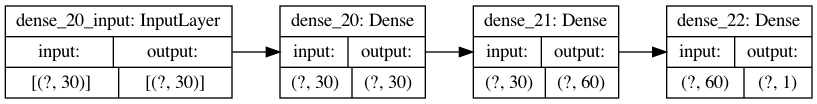

In [219]:
# `rankdir='LR'` is to make the graph horizontal.
keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [220]:
y_pred_class = model.predict(X_train)
y_pred_class = np.where(y_pred_class > .5, 1, 0)
training_accuracy = metrics.accuracy_score(y_train, y_pred_class)
training_error = 1 - training_accuracy

y_pred_class = model.predict(X_test)
y_pred_class = np.where(y_pred_class > .5, 1, 0)
testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
testing_error = 1 - testing_accuracy

In [221]:
print("MLP accuracy: {0}, Test error: {1}".format(testing_accuracy, testing_error))

MLP accuracy: 0.9790209790209791, Test error: 0.020979020979020935


In [222]:
print("Confusion Matrix:\n{0}".format(metrics.confusion_matrix(y_test, y_pred_class)))

Confusion Matrix:
[[90  1]
 [ 2 50]]


In [223]:
print(classification_report(y_test.values, y_pred_class))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        91
           1       0.98      0.96      0.97        52

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

